## **BSI Data Summary Statistics**

# Data Exploration

In [ ]:
# import statements
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# get rid of scientific notation (to make results more readable)
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# mount google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# read data from google drive and convert to df
df=pd.read_csv('gdrive/My Drive/BSI/data_pos_neg_nbc.csv')

In [ ]:
# look at the data
df.head()

,age___vital,age___lab,temp___vital,heart_rate___vital,systolic_blood_pressure___vital,diastolic_blood_pressure___vital,resp_rate___vital,glucose___vital,bilirubin___vital,potassium___vital,albumin___vital,calcium___vital,wbc___vital,creatinine___vital,platelet_count___vital,alt___vital,alp___vital,ast___vital,paco2___vital,chloride___vital,troponin___vital,ptt___vital,lactate___vital,bun___vital,magnesium___vital,y___pos,y___nbc,y___neg,__time_bin,__uid,__anchor,__ep_relative_time,__ep_order
0,65.854,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,1.000,-44,uva_1291,__neg,-5760,1
1,65.854,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,1.000,-43,uva_1291,__neg,-5700,1
2,65.854,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,1.000,-42,uva_1291,__neg,-5640,1
3,65.854,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,1.000,-41,uva_1291,__neg,-5580,1
4,65.854,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,1.000,-40,uva_1291,__neg,-5520,1


In [ ]:
# info on the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095685 entries, 0 to 2095684
Data columns (total 33 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   age___vital                       float64
 1   age___lab                         float64
 2   temp___vital                      float64
 3   heart_rate___vital                float64
 4   systolic_blood_pressure___vital   float64
 5   diastolic_blood_pressure___vital  float64
 6   resp_rate___vital                 float64
 7   glucose___vital                   float64
 8   bilirubin___vital                 float64
 9   potassium___vital                 float64
 10  albumin___vital                   float64
 11  calcium___vital                   float64
 12  wbc___vital                       float64
 13  creatinine___vital                float64
 14  platelet_count___vital            float64
 15  alt___vital                       float64
 16  alp___vital                       fl

In [ ]:
# basic summary statistics about the data set 
df.describe()

,age___vital,age___lab,temp___vital,heart_rate___vital,systolic_blood_pressure___vital,diastolic_blood_pressure___vital,resp_rate___vital,glucose___vital,bilirubin___vital,potassium___vital,albumin___vital,calcium___vital,wbc___vital,creatinine___vital,platelet_count___vital,alt___vital,alp___vital,ast___vital,paco2___vital,chloride___vital,troponin___vital,ptt___vital,lactate___vital,bun___vital,magnesium___vital,y___pos,y___nbc,y___neg,__time_bin,__ep_relative_time,__ep_order
count,2095685.000,1880636.000,412058.000,351496.000,417841.000,417839.000,347209.000,732438.000,371827.000,747851.000,309752.000,625665.000,757829.000,755973.000,246049.000,376486.000,360170.000,377698.000,209381.000,738493.000,107444.000,492140.000,246187.000,751395.000,632832.000,2095685.000,2095685.000,2095685.000,2095685.000,2095685.000,2095685.000
mean,64.020,64.243,0.711,88.199,115.922,63.135,20.739,135.982,2.700,4.106,3.061,8.500,11.011,1.580,226.458,82.201,150.256,96.164,41.356,103.638,1.008,37.463,1.834,30.338,2.014,0.040,0.505,0.455,7574.925,-2880.000,8.483
std,17.896,18.000,0.126,17.725,22.397,14.096,6.087,62.785,5.957,0.631,16.975,0.835,9.467,2.701,144.599,344.630,154.627,464.985,9.792,6.208,3.882,19.486,1.757,23.912,0.777,0.196,0.500,0.498,13760.104,1680.000,13.123
min,17.821,18.000,0.222,9.200,4.000,2.000,1.000,0.000,0.000,0.000,0.400,0.000,0.100,0.000,7.000,0.000,7.000,3.000,0.000,0.000,0.010,0.000,0.300,0.000,0.200,0.000,0.000,0.000,-98931.000,-5760.000,1.000
25%,52.000,52.000,0.614,75.023,100.000,53.000,16.203,101.000,0.400,3.700,2.400,8.000,6.700,0.700,125.000,16.000,72.000,22.000,35.000,100.000,0.030,27.000,1.000,14.000,1.800,0.000,0.000,0.000,112.000,-4320.000,2.000
50%,64.000,64.000,0.647,87.000,107.500,62.000,20.000,121.000,0.700,4.000,2.900,8.400,9.620,1.000,202.000,28.000,102.000,35.000,40.000,104.000,0.080,30.900,1.400,23.000,2.000,0.000,1.000,0.000,1304.000,-2880.000,3.000
75%,76.000,76.000,0.879,100.000,130.000,72.000,24.000,152.000,1.800,4.400,3.500,9.000,13.500,1.700,298.000,57.000,165.000,68.000,46.000,107.000,0.320,38.800,2.033,39.000,2.200,0.000,1.000,1.000,7893.000,-1440.000,9.000
max,110.000,110.000,0.981,205.000,257.000,249.000,69.000,2440.000,82.800,13.200,3340.000,25.400,600.200,387.000,1340.000,16776.000,2724.000,23952.000,117.100,154.000,48.300,150.000,76.000,261.000,129.000,1.000,1.000,1.000,97457.000,0.000,129.000


In [ ]:
# separate predictors and responses
predictors = df.drop(columns=["y___pos", "y___nbc", "y___neg", "__time_bin","__uid", "__anchor", "__ep_relative_time", "__ep_order"])
responses = df[["y___pos", "y___nbc", "y___neg", "__anchor"]]

In [ ]:
# feature statistics of predictors
predictors.describe()

,age___vital,age___lab,temp___vital,heart_rate___vital,systolic_blood_pressure___vital,diastolic_blood_pressure___vital,resp_rate___vital,glucose___vital,bilirubin___vital,potassium___vital,albumin___vital,calcium___vital,wbc___vital,creatinine___vital,platelet_count___vital,alt___vital,alp___vital,ast___vital,paco2___vital,chloride___vital,troponin___vital,ptt___vital,lactate___vital,bun___vital,magnesium___vital
count,2095685.000,1880636.000,412058.000,351496.000,417841.000,417839.000,347209.000,732438.000,371827.000,747851.000,309752.000,625665.000,757829.000,755973.000,246049.000,376486.000,360170.000,377698.000,209381.000,738493.000,107444.000,492140.000,246187.000,751395.000,632832.000
mean,64.020,64.243,0.711,88.199,115.922,63.135,20.739,135.982,2.700,4.106,3.061,8.500,11.011,1.580,226.458,82.201,150.256,96.164,41.356,103.638,1.008,37.463,1.834,30.338,2.014
std,17.896,18.000,0.126,17.725,22.397,14.096,6.087,62.785,5.957,0.631,16.975,0.835,9.467,2.701,144.599,344.630,154.627,464.985,9.792,6.208,3.882,19.486,1.757,23.912,0.777
min,17.821,18.000,0.222,9.200,4.000,2.000,1.000,0.000,0.000,0.000,0.400,0.000,0.100,0.000,7.000,0.000,7.000,3.000,0.000,0.000,0.010,0.000,0.300,0.000,0.200
25%,52.000,52.000,0.614,75.023,100.000,53.000,16.203,101.000,0.400,3.700,2.400,8.000,6.700,0.700,125.000,16.000,72.000,22.000,35.000,100.000,0.030,27.000,1.000,14.000,1.800
50%,64.000,64.000,0.647,87.000,107.500,62.000,20.000,121.000,0.700,4.000,2.900,8.400,9.620,1.000,202.000,28.000,102.000,35.000,40.000,104.000,0.080,30.900,1.400,23.000,2.000
75%,76.000,76.000,0.879,100.000,130.000,72.000,24.000,152.000,1.800,4.400,3.500,9.000,13.500,1.700,298.000,57.000,165.000,68.000,46.000,107.000,0.320,38.800,2.033,39.000,2.200
max,110.000,110.000,0.981,205.000,257.000,249.000,69.000,2440.000,82.800,13.200,3340.000,25.400,600.200,387.000,1340.000,16776.000,2724.000,23952.000,117.100,154.000,48.300,150.000,76.000,261.000,129.000


In [ ]:
# feature statistics of responses
responses.describe(include="all")

,y___pos,y___nbc,y___neg,__anchor
count,2095685.000,2095685.000,2095685.000,2095685
unique,nan,nan,nan,3
top,nan,nan,nan,__nbc
freq,nan,nan,nan,1382056
mean,0.040,0.505,0.455,NaN
std,0.196,0.500,0.498,NaN
min,0.000,0.000,0.000,NaN
25%,0.000,0.000,0.000,NaN
50%,0.000,1.000,0.000,NaN
75%,0.000,1.000,1.000,NaN


In [ ]:
# number of missing values by column
df.isnull().sum(axis = 0)

age___vital                               0
age___lab                            215049
temp___vital                        1683627
heart_rate___vital                  1744189
systolic_blood_pressure___vital     1677844
diastolic_blood_pressure___vital    1677846
resp_rate___vital                   1748476
glucose___vital                     1363247
bilirubin___vital                   1723858
potassium___vital                   1347834
albumin___vital                     1785933
calcium___vital                     1470020
wbc___vital                         1337856
creatinine___vital                  1339712
platelet_count___vital              1849636
alt___vital                         1719199
alp___vital                         1735515
ast___vital                         1717987
paco2___vital                       1886304
chloride___vital                    1357192
troponin___vital                    1988241
ptt___vital                         1603545
lactate___vital                 

In [ ]:
# total number of missing values
df.isnull().sum(axis = 0).sum()

37629751

In [ ]:
# total number of values
df.count().sum()

31527854

In [ ]:
# percent of dataset that is missing
df.isnull().sum(axis = 0).sum() / (df.shape[0]*df.shape[1])

0.5441158785067817

In [ ]:
# number of patients 
len(pd.unique(df['__uid']))

5000

In [ ]:
# info on unique patients
df[['__uid']].describe()

,__uid
count,2095685
unique,5000
top,mimic_18356
freq,12513


In [ ]:
# value counts by patient id
df['__uid'].value_counts()

mimic_18356    12513
mimic_13329    10088
mimic_26274     9894
mimic_6510      9506
mimic_25790     7760
               ...  
mimic_54077       97
mimic_62564       97
mimic_20589       97
mimic_1208        97
mimic_27397       97
Name: __uid, Length: 5000, dtype: int64

In [ ]:
# info on anchor feature
df["__anchor"].describe()

count     2095685
unique          3
top         __nbc
freq      1382056
Name: __anchor, dtype: object

In [ ]:
# value counts of episode anchor
df['__anchor'].value_counts()

__nbc    1382056
__neg     656690
__pos      56939
Name: __anchor, dtype: int64

In [ ]:
# patient distribution of response (episode anchor)
df.groupby('__anchor')['__uid'].describe()

,count,unique,top,freq
__anchor,,,,
__nbc,1382056,3520,mimic_18356,12416
__neg,656690,4785,mimic_19213,2231
__pos,56939,501,uva_4278,679


In [ ]:
# feature statistics of predictor (temperature) stratified by response (episode anchor)
df.groupby('__anchor')['temp___vital'].describe()

,count,mean,std,min,25%,50%,75%,max
__anchor,,,,,,,,
__nbc,206634.000,0.718,0.128,0.282,0.617,0.649,0.882,0.979
__neg,184478.000,0.699,0.122,0.382,0.614,0.641,0.875,0.981
__pos,20946.000,0.744,0.135,0.222,0.621,0.675,0.887,0.966


In [ ]:
# patient distribution of temperature stratified by response (episode anchor)
df.groupby(['temp___vital', '__anchor'])['__uid'].describe()

count unique          top freq
temp___vital __anchor                               
0.222        __pos        1      1  mimic_88953    1
0.282        __nbc        1      1  mimic_26649    1
0.342        __pos       12      1   mimic_5666   12
0.357        __nbc        1      1   mimic_9130    1
0.382        __neg       13      1  mimic_12531   13
...                     ...    ...          ...  ...
0.966        __nbc       18      6     uva_4341    6
             __pos        3      1     uva_2454    3
0.969        __nbc       12      2     uva_4350   11
0.979        __nbc        2      1     uva_4891    2
0.981        __neg        1      1     uva_6515    1

[5103 rows x 4 columns]

In [ ]:
df.groupby(['__anchor', 'magnesium___vital'])['__uid'].describe()

count unique          top freq
__anchor magnesium___vital                               
__nbc    0.400                13      1  mimic_16367   13
         0.500                13      1  mimic_16367   13
         0.600                13      1   mimic_4467   13
         0.700                29      3  mimic_11342   13
         0.800                21      3   mimic_8266   13
...                          ...    ...          ...  ...
__pos    3.500                14      1  mimic_55887   14
         3.600                16      1  mimic_19213   16
         3.700                18      1   mimic_2691   18
         4.000                 3      1  mimic_23503    3
         4.400                14      1  mimic_18333   14

[545 rows x 4 columns]

In [ ]:
# patient distribution of temp stratified by response
df.groupby(['temp___vital', '__anchor'])['__uid'].describe()

count unique          top freq
temp___vital __anchor                               
0.222        __pos        1      1  mimic_88953    1
0.282        __nbc        1      1  mimic_26649    1
0.342        __pos       12      1   mimic_5666   12
0.357        __nbc        1      1   mimic_9130    1
0.382        __neg       13      1  mimic_12531   13
...                     ...    ...          ...  ...
0.966        __nbc       18      6     uva_4341    6
             __pos        3      1     uva_2454    3
0.969        __nbc       12      2     uva_4350   11
0.979        __nbc        2      1     uva_4891    2
0.981        __neg        1      1     uva_6515    1

[5103 rows x 4 columns]

In [ ]:
# pie chart of patient distribution of episode anchor
import plotly.offline as pyo
labels = df.groupby('__anchor')['__uid'].nunique().index
values = df.groupby('__anchor')['__uid'].nunique().values

fig = {'data' : [{'type' : 'pie', 
                 'labels' : labels,
                 'values' : values,
                 'direction' : 'clockwise',
                 }]}

pyo.iplot(fig)

In [ ]:
# value counts of episode anchor grouped by patient id 
df.groupby('__uid')['__anchor'].value_counts()

__uid        __anchor
mimic_1001   __nbc       776
             __neg        97
mimic_1004   __nbc       194
             __neg       194
mimic_10049  __nbc        97
                        ... 
uva_9939     __nbc        97
             __neg        97
uva_9944     __neg        97
uva_9949     __neg        97
uva_9950     __neg        97
Name: __anchor, Length: 8806, dtype: int64

In [ ]:
# value counts of no blood culture
df['y___nbc'].value_counts()

1.0    1057591
0.0    1038094
Name: y___nbc, dtype: int64

In [ ]:
# patients with no blood culture
df.groupby('y___nbc')['__uid'].nunique()

y___nbc
0.0    5000
1.0    2010
Name: __uid, dtype: int64

In [ ]:
# patients with no blood culture
df.groupby('y___nbc')['__uid'].describe()

,count,unique,top,freq
y___nbc,,,,
0.0,1038094,5000,mimic_19213,3104
1.0,1057591,2010,mimic_18356,12319


In [ ]:
# patient distribution of nbc, pos, and neg
df.groupby(['y___nbc','y___pos', 'y___neg'])['__uid'].describe()

count unique          top   freq
y___nbc y___pos y___neg                                    
0.000   0.000   1.000     953898   4775  mimic_19213   3007
        1.000   0.000      84196    501  mimic_17891   1358
1.000   0.000   0.000    1057591   2010  mimic_18356  12319

In [ ]:
# patients with positive blood culture
df.groupby('y___pos')['__uid'].describe()

,count,unique,top,freq
y___pos,,,,
0.0,2011489,4856,mimic_18356,12513
1.0,84196,501,mimic_17891,1358


In [ ]:
df.groupby(['y___nbc','y___neg'])['__uid'].describe()

count unique          top   freq
y___nbc y___neg                                    
0.0     0.0        84196    501  mimic_17891   1358
        1.0       953898   4775  mimic_19213   3007
1.0     0.0      1057591   2010  mimic_18356  12319

In [ ]:
# patients with positive blood culture
df.groupby('y___pos')['__uid'].nunique()

y___pos
0.0    4856
1.0     501
Name: __uid, dtype: int64

In [ ]:
# patients with negative blood culture
df.groupby('y___neg')['__uid'].nunique()

y___neg
0.0    2278
1.0    4775
Name: __uid, dtype: int64

**Temporal Structure**

In [ ]:
# isolate a patient with two episodes of data
a = df[df["__uid"]=="mimic_27397"]
a["__ep_order"].nunique() 

1

In [ ]:
# look at the data
a.head()

,age___vital,age___lab,temp___vital,heart_rate___vital,systolic_blood_pressure___vital,diastolic_blood_pressure___vital,resp_rate___vital,glucose___vital,bilirubin___vital,potassium___vital,albumin___vital,calcium___vital,wbc___vital,creatinine___vital,platelet_count___vital,alt___vital,alp___vital,ast___vital,paco2___vital,chloride___vital,troponin___vital,ptt___vital,lactate___vital,bun___vital,magnesium___vital,y___pos,y___nbc,y___neg,__time_bin,__uid,__anchor,__ep_relative_time,__ep_order
1619609,33.000,33.000,0.636,53.000,108.000,64.000,12.000,132.000,nan,4.300,nan,8.700,7.000,1.100,252.000,nan,nan,nan,nan,104.000,nan,30.800,1.400,15.000,2.100,0.000,0.000,1.000,21,mimic_27397,__neg,-5760,1
1619610,33.000,33.000,0.636,56.000,115.000,67.000,15.000,132.000,nan,4.300,nan,8.700,7.000,1.100,252.000,nan,nan,nan,nan,104.000,nan,30.800,1.400,15.000,2.100,0.000,0.000,1.000,22,mimic_27397,__neg,-5700,1
1619611,33.000,33.000,0.634,64.000,116.000,63.000,14.000,132.000,nan,4.300,nan,8.700,7.000,1.100,252.000,nan,nan,nan,nan,104.000,nan,30.800,1.400,15.000,2.100,0.000,0.000,1.000,23,mimic_27397,__neg,-5640,1
1619612,33.000,33.000,0.634,57.000,110.000,69.000,12.000,132.000,nan,4.300,nan,8.700,7.000,1.100,252.000,nan,nan,nan,nan,104.000,nan,30.800,1.400,15.000,2.100,0.000,0.000,1.000,24,mimic_27397,__neg,-5580,1
1619613,33.000,33.000,0.634,59.000,113.000,73.000,13.000,106.000,nan,4.300,nan,8.700,7.000,1.100,252.000,nan,nan,nan,nan,104.000,nan,30.800,nan,15.000,2.100,0.000,0.000,1.000,25,mimic_27397,__neg,-5520,1


In [ ]:
# time bin values - 97 unique values, increasing by one 
print(a["__time_bin"].nunique())
a["__time_bin"].values

97


array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117])

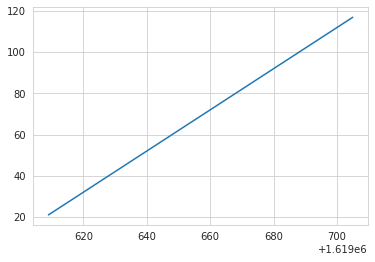

In [ ]:
a["__time_bin"].plot()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7f4a3904b710> has a label of '__time_bin' which cannot be automatically added to the legend.



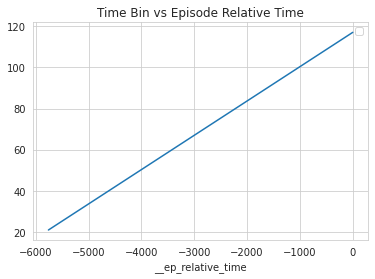

In [ ]:
# plot time bin vs relative time
a.plot(y="__time_bin", x="__ep_relative_time", title="Time Bin vs Episode Relative Time")

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7f4a38f0aed0> has a label of '__time_bin' which cannot be automatically added to the legend.



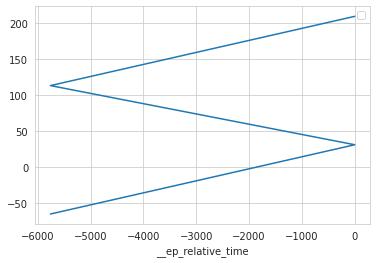

In [ ]:
a2.plot(y="__time_bin", x="__ep_relative_time")

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7f4a3902f790> has a label of '__time_bin' which cannot be automatically added to the legend.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7f4a38f92750> has a label of '__time_bin' which cannot be automatically added to the legend.



__ep_order
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

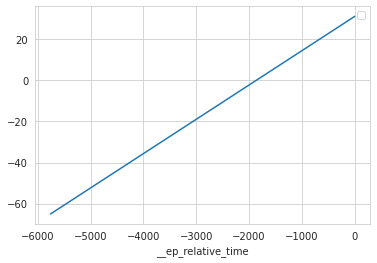

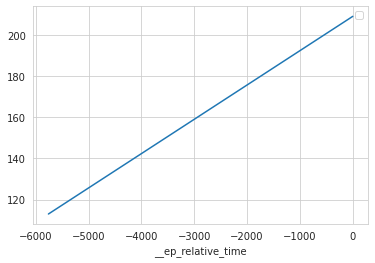

In [ ]:
# plot time bin vs relative time for each episode
a2.groupby("__ep_order").plot(y="__time_bin", x="__ep_relative_time")

In [ ]:
a2 = df[df["__uid"]=="mimic_78204"]
a2.shape

(194, 33)

In [ ]:
# episode relative time values - 97 unique values from -5760 to 0, increments of 60 minutes (one hour)
print(a["__ep_relative_time"].nunique())
a["__ep_relative_time"].values

97


array([-5760, -5700, -5640, -5580, -5520, -5460, -5400, -5340, -5280,
       -5220, -5160, -5100, -5040, -4980, -4920, -4860, -4800, -4740,
       -4680, -4620, -4560, -4500, -4440, -4380, -4320, -4260, -4200,
       -4140, -4080, -4020, -3960, -3900, -3840, -3780, -3720, -3660,
       -3600, -3540, -3480, -3420, -3360, -3300, -3240, -3180, -3120,
       -3060, -3000, -2940, -2880, -2820, -2760, -2700, -2640, -2580,
       -2520, -2460, -2400, -2340, -2280, -2220, -2160, -2100, -2040,
       -1980, -1920, -1860, -1800, -1740, -1680, -1620, -1560, -1500,
       -1440, -1380, -1320, -1260, -1200, -1140, -1080, -1020,  -960,
        -900,  -840,  -780,  -720,  -660,  -600,  -540,  -480,  -420,
        -360,  -300,  -240,  -180,  -120,   -60,     0])